In [1]:
import numpy as np
import scipy as sp
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  


## Consumption Growth Function ##

$ln({\tilde{g}}) = 0.02 + 0.02{\tilde{\epsilon}} + {\tilde{\nu}}$

${\tilde{\epsilon}}$ is a standard normal random variable.

${\tilde{\nu}}$ is is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

In [27]:
no_of_draws = 100000
my_sigma = 0.99
my_gamma = 1
my_lambda = 2
R_f = np.exp(0.0198)/0.99


In [28]:
epsilon = np.random.standard_normal(no_of_draws)
epsilon

array([ 0.61488854, -1.29000056, -0.78624779, ...,  0.12556314,
        0.19719588, -1.61066205])

In [29]:
g = np.exp(0.02 + 0.02 * epsilon)
g

array([1.032825  , 0.99421678, 1.0042842 , ..., 1.02276655, 1.02423287,
       0.98786104])

In [30]:
b_0 = np.arange(0,10.1,0.1)
b_0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Define error term
$$e(x) = 0.99b_0E[v(x\tilde{g})]+0.99x -1$$

where 
$$v(R) = r - 1.0303 ; R\geq 1.0303$$
$$v(R) = 2(r - 1.0303) ; R < 1.0303$$
$$ R_f \approx 1.0303$$
solve to minimize e(x)

In [31]:
err_tolerance = 10**-5

In [32]:
def utility(r,R_f):
    if r >= R_f :
        utility = r - R_f
    else :
        utility = 2 * (r - R_f)
    return utility


In [101]:
#should we implement our own bisection search ?
def bisect_x(x_lower, x_upper , b , g):
    x_0 = (x_lower + x_upper )/2
    expected_utility = np.average([utility(i*x_0,R_f) for i in g])
    expected_return = np.average([(i*x_0,R_f) for i in g])
    error = 0.99 * b * expected_utility + 0.99*x_0 -1
    if np.abs(error) <= err_tolerance:
        return x_0,expected_utility,expected_return
    else:
        if (error > 0) and (np.abs(error) > err_tolerance):
            x_0,expected_utility,expected_return =\
                bisect_x(x_lower,x_0 , b , g)
        elif (error < 0) and (np.abs(error) > err_tolerance):
            x_0,expected_utility,expected_return =\
                bisect_x(x_0,x_upper, b , g)
            
    return x_0,expected_utility,expected_return

In [102]:
possible_x = []
possible_utility =[]
possible_return =[]
x_lower = 1
x_upper = 1.1
for b in b_0:
    my_x,my_utility,my_return = bisect_x(x_lower, x_upper , b , g)
    #print(w)
    possible_x.append(my_x)
    possible_utility.append(my_utility)
    possible_return.append(my_return)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


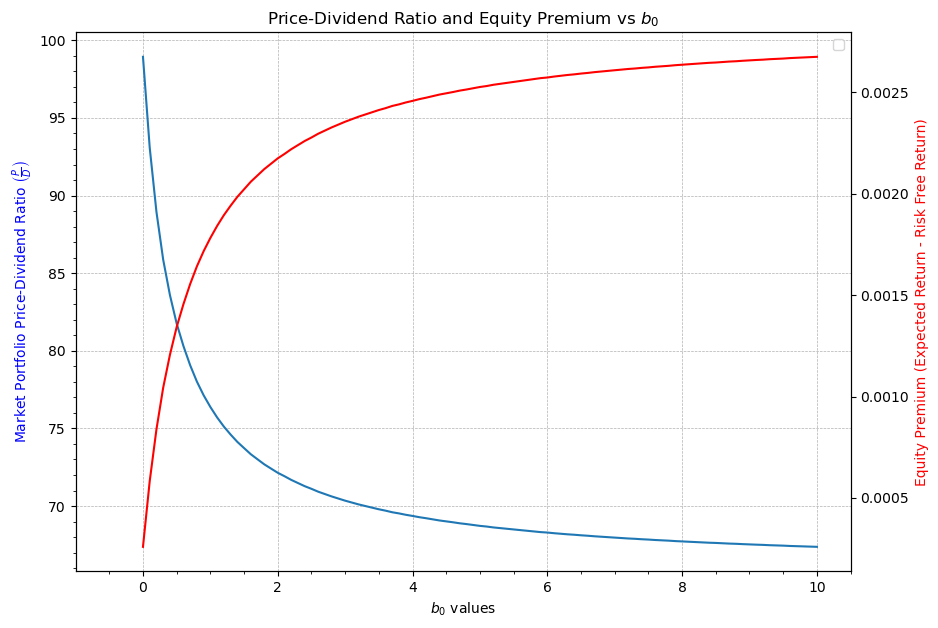

In [123]:
df = pd.DataFrame(list(zip(b_0,possible_x,possible_utility,possible_return))\
                    ,columns=('b','x','exp_util','exp_return'))
df['pd_ratio'] = 1/(df['x']-1)
df


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


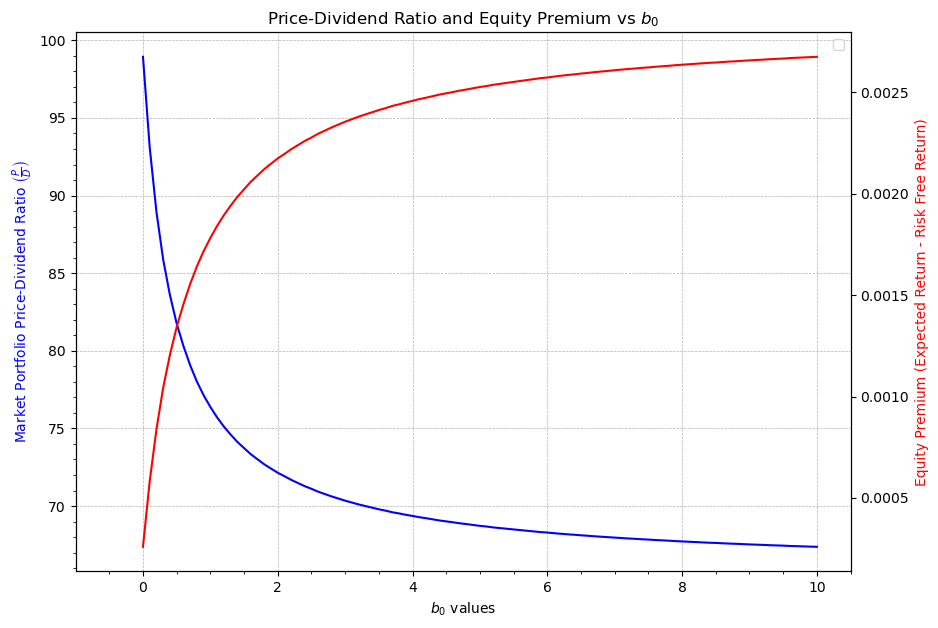

In [139]:
f0, ax0 = plt.subplots(1)
f0.set_figheight(7)
f0.set_figwidth(10)
ax0.plot(df['b'],df['pd_ratio'],color='blue')
ax1= ax0.twinx()
ax1.plot(df['b'],df['exp_return']-R_f,color='red')

#ax1.plot(df['b'],df['x'],color='red')
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.yaxis.set_major_locator(ticker.AutoLocator())
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.set_xlim(-1)
ax0.set_xlabel(r'$b_0$ values')
ax0.set_ylabel(r'Market Portfolio Price-Dividend Ratio $\left(\frac{P}{D}\right)$',color='blue')
ax1.set_ylabel(r'Equity Premium (Expected Return - Risk Free Return)',color='red')

ax0.grid(linestyle = '--', linewidth = 0.5)
ax0.legend()
ax0.set_title(r'Price-Dividend Ratio and Equity Premium vs $b_0$')
plt.show(f0)
f0.savefig('f0.jpg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


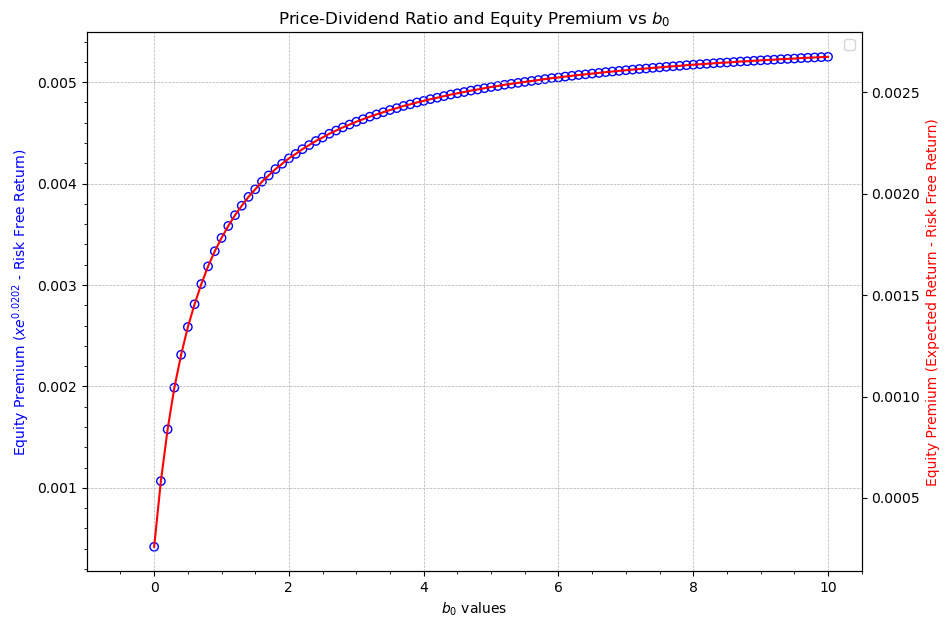

In [138]:
f0, ax0 = plt.subplots(1)
f0.set_figheight(7)
f0.set_figwidth(10)
ax0.scatter(df['b'], df['x']*np.exp(0.0202) - R_f ,color='blue',facecolors='none')
ax1= ax0.twinx()
ax1.plot(df['b'],df['exp_return']-R_f,color='red')

#ax1.plot(df['b'],df['x'],color='red')
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.yaxis.set_major_locator(ticker.AutoLocator())
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.set_xlim(-1)
ax0.set_xlabel(r'$b_0$ values')
ax0.set_ylabel(r'Equity Premium ($xe^{0.0202}$ - Risk Free Return)',color='blue')
ax1.set_ylabel(r'Equity Premium (Expected Return - Risk Free Return)',color='red')

ax0.grid(linestyle = '--', linewidth = 0.5)
ax0.legend()
ax0.set_title(r'Price-Dividend Ratio and Equity Premium vs $b_0$')
plt.show(f0)
f0.savefig('f1.jpg')